In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('/dfs/scratch0/vschen/metal')

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Generate Data

target sp: 0.1, found sp: 0.1008, found r: 1.7500000000000009


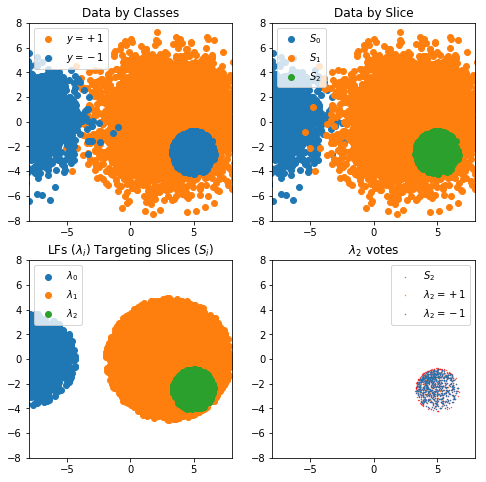

{'N': 10000,
 'mus': [array([-8,  0]), array([3, 0])],
 'labels': [-1, 1],
 'props': [0.25, 0.75],
 'variances': [3, 5],
 'head_config': {'h': 5, 'k': -2.5, 'r': 1.8, 'slice_label': -1},
 'accs': array([0.9, 0.9, 0.9]),
 'covs': [('recall', 0.9), ('recall', 0.9), ('recall', 0.9)]}

In [4]:
from simulate import data_config as config
from synthetics_utils import generate_synthetic_data
from visualization_utils import visualize_data, display_scores, plot_slice_scores
X, Y, C, L = generate_synthetic_data(config, 'sp', 0.1, verbose=True)

# L[L[:, 2] != 0, 2] = 0 # remove LF2 to show data underneath
visualize_data(X, Y, C, L)
config

## Vary Slice Porportion 
_Ratio fo Green to Orange in Top Right figure_

In [5]:
from simulate import simulate, data_config, experiment_config, model_configs
experiment_config['use_weak_labels_from_gen_model'] = True
experiment_config['x_var'] = 'sp'
experiment_config['num_trials'] = 10
experiment_config['x_range'] = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4]
experiment_config['verbose'] = False
sp_scores = \
    simulate(data_config, generate_synthetic_data, experiment_config, model_configs)
display_scores(sp_scores, experiment_config['x_var'], experiment_config['x_range'])

Simulating: sp=0.05



Simulating: sp=0.1



Simulating: sp=0.2



Simulating: sp=0.25



Simulating: sp=0.3



Simulating: sp=0.35



Simulating: sp=0.4


,EndModel,UniformModel,ManualModel,AttentionModel
sp: 0.05,,,,
S0,0.997960,0.997137,0.992822,0.994703
S1,0.959208,0.977128,0.979914,0.978095
S2,0.000000,0.005195,0.129861,0.063857
overall,0.930350,0.942900,0.948500,0.945350


,EndModel,UniformModel,ManualModel,AttentionModel
sp: 0.1,,,,
S0,1.000000,0.997904,0.993711,0.995807
S1,0.986832,0.981712,0.987564,0.990490
S2,0.000000,0.044872,0.134615,0.301282
overall,0.913000,0.912500,0.922500,0.938000


,EndModel,UniformModel,ManualModel,AttentionModel
sp: 0.2,,,,
S0,0.996917,0.995896,0.986507,0.991304
S1,0.966051,0.973066,0.972419,0.967542
S2,0.000000,0.294356,0.401095,0.307727
overall,0.816000,0.867600,0.883100,0.866200


,EndModel,UniformModel,ManualModel,AttentionModel
sp: 0.25,,,,
S0,0.996947,0.991032,0.988767,0.991609
S1,0.972072,0.973303,0.969743,0.970663
S2,0.000518,0.169829,0.397522,0.272072
overall,0.788250,0.820450,0.862500,0.839750


,EndModel,UniformModel,ManualModel,AttentionModel
sp: 0.3,,,,
S0,0.994132,0.995403,0.994783,0.993785
S1,0.964724,0.969435,0.976586,0.960443
S2,0.002123,0.458384,0.445789,0.431658
overall,0.742900,0.855100,0.854650,0.842250


,EndModel,UniformModel,ManualModel,AttentionModel
sp: 0.35,,,,
S0,0.972812,0.994338,0.991034,0.994562
S1,0.964046,0.977361,0.972640,0.971155
S2,0.003758,0.531039,0.454600,0.406734
overall,0.702550,0.858400,0.834100,0.821800


,EndModel,UniformModel,ManualModel,AttentionModel
sp: 0.4,,,,
S0,0.999175,0.992027,0.987284,0.988962
S1,0.956008,0.967722,0.971826,0.975446
S2,0.001085,0.342594,0.367080,0.461982
overall,0.665350,0.776700,0.784600,0.816900


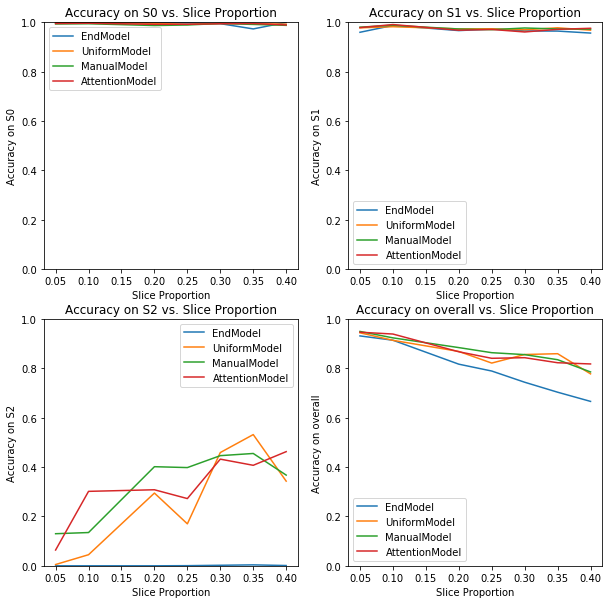

In [6]:
plot_slice_scores(sp_scores, xlabel="Slice Proportion")

## Vary Head LF Accuracy
_blue to orange dots in bottom right figure_

In [7]:
%%time

from simulate import simulate, experiment_config, model_configs
experiment_config['use_weak_labels_from_gen_model'] = True
experiment_config['x_var'] = 'acc'
experiment_config['num_trials'] = 10
experiment_config['x_range'] = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
lf_acc_scores = \
    simulate(data_config, generate_synthetic_data, experiment_config, model_configs)

display_scores(lf_acc_scores, experiment_config['x_var'], experiment_config['x_range'])

Simulating: acc=0.6



Simulating: acc=0.65



Simulating: acc=0.7



Simulating: acc=0.75



Simulating: acc=0.8



Simulating: acc=0.85



Simulating: acc=0.9



Simulating: acc=0.95


,EndModel,UniformModel,ManualModel,AttentionModel
acc: 0.6,,,,
S0,0.997904,0.997904,0.991614,0.985325
S1,0.975628,0.988922,0.988183,0.991876
S2,0.000000,0.000000,0.000000,0.000000
overall,0.898500,0.907500,0.905500,0.906500


,EndModel,UniformModel,ManualModel,AttentionModel
acc: 0.65,,,,
S0,0.995807,0.997904,0.995807,0.991614
S1,0.980798,0.979321,0.975628,0.949778
S2,0.000000,0.000000,0.000000,0.000000
overall,0.901500,0.901000,0.898000,0.879500


,EndModel,UniformModel,ManualModel,AttentionModel
acc: 0.7,,,,
S0,1.000000,0.997904,0.993711,1.000000
S1,0.982275,0.986706,0.971935,0.957903
S2,0.000000,0.000000,0.000000,0.000000
overall,0.903500,0.906000,0.895000,0.887000


,EndModel,UniformModel,ManualModel,AttentionModel
acc: 0.75,,,,
S0,0.993170,0.994146,0.989087,0.990726
S1,0.960983,0.968119,0.976735,0.970416
S2,0.000000,0.000000,0.000000,0.000562
overall,0.886150,0.891350,0.895900,0.891900


,EndModel,UniformModel,ManualModel,AttentionModel
acc: 0.8,,,,
S0,0.996187,0.993485,0.987469,0.993507
S1,0.971036,0.978944,0.986648,0.968918
S2,0.000000,0.000000,0.000000,0.000000
overall,0.891850,0.896600,0.899700,0.889750


,EndModel,UniformModel,ManualModel,AttentionModel
acc: 0.85,,,,
S0,0.998573,0.992422,0.992277,0.988280
S1,0.961216,0.977956,0.984333,0.975112
S2,0.000000,0.000000,0.000000,0.000000
overall,0.886150,0.895900,0.900200,0.892700


,EndModel,UniformModel,ManualModel,AttentionModel
acc: 0.9,,,,
S0,0.957719,0.993408,0.994438,0.995927
S1,0.965302,0.980925,0.975910,0.973473
S2,0.000000,0.202411,0.289976,0.295546
overall,0.877800,0.915400,0.920250,0.919400


,EndModel,UniformModel,ManualModel,AttentionModel
acc: 0.95,,,,
S0,0.997954,0.995341,0.993226,0.991070
S1,0.967580,0.971211,0.972279,0.968627
S2,0.000000,0.825898,0.882861,0.844296
overall,0.889250,0.964250,0.969350,0.963100


CPU times: user 1d 14h 7min 38s, sys: 15min 33s, total: 1d 14h 23min 11s
Wall time: 1h 46min 9s


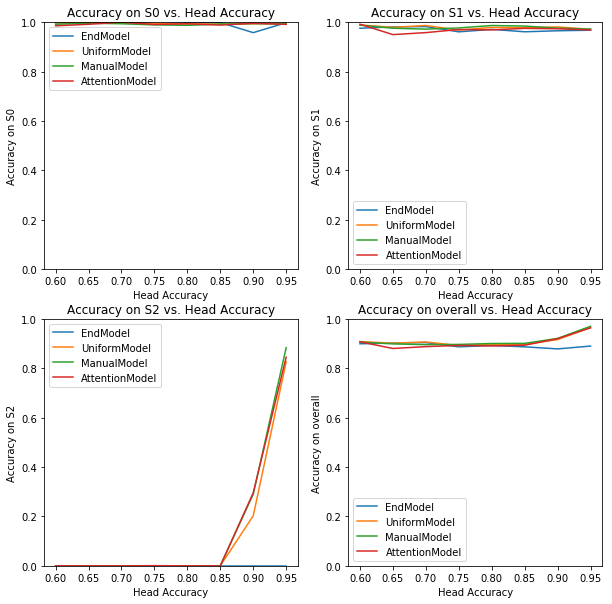

In [8]:
plot_slice_scores(lf_acc_scores, xlabel="Head Accuracy")

## Vary Head LF Precision
_num of blue dots in red slice over num blue bots right_

In [9]:
%%time

from simulate import simulate, experiment_config, model_configs

data_config['head_config']['r'] = 2
experiment_config['use_weak_labels_from_gen_model'] = True
experiment_config['x_var'] = 'cov.precision'
experiment_config['num_trials'] = 10
experiment_config['x_range'] = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
lf_prec_scores = \
    simulate(data_config, generate_synthetic_data, experiment_config, model_configs)

display_scores(lf_prec_scores, experiment_config['x_var'], experiment_config['x_range'])

Simulating: cov.precision=0.6



Simulating: cov.precision=0.65



Simulating: cov.precision=0.7



Simulating: cov.precision=0.75



Simulating: cov.precision=0.8



Simulating: cov.precision=0.85



Simulating: cov.precision=0.9



Simulating: cov.precision=0.95


,EndModel,UniformModel,ManualModel,AttentionModel
cov.precision: 0.6,,,,
S0,1.000000,0.989518,1.000000,0.970650
S1,0.986175,0.966206,0.956989,0.939324
S2,0.000000,0.167421,0.167421,0.185520
overall,0.880500,0.883500,0.880000,0.863500


,EndModel,UniformModel,ManualModel,AttentionModel
cov.precision: 0.65,,,,
S0,0.991922,0.990436,0.991782,0.996303
S1,0.965159,0.958965,0.962176,0.957602
S2,0.000405,0.189910,0.192440,0.196245
overall,0.867050,0.883250,0.886050,0.884500


,EndModel,UniformModel,ManualModel,AttentionModel
cov.precision: 0.7,,,,
S0,0.987899,0.993054,0.983955,0.994500
S1,0.969950,0.960763,0.968222,0.958024
S2,0.000000,0.228539,0.231810,0.198811
overall,0.869700,0.889600,0.892250,0.885300


,EndModel,UniformModel,ManualModel,AttentionModel
cov.precision: 0.75,,,,
S0,0.996137,0.988522,0.992430,0.998163
S1,0.959281,0.963787,0.967528,0.958973
S2,0.001914,0.234884,0.242767,0.222293
overall,0.865400,0.891600,0.895650,0.889350


,EndModel,UniformModel,ManualModel,AttentionModel
cov.precision: 0.8,,,,
S0,0.993292,0.993171,0.991928,0.995507
S1,0.970005,0.967270,0.971829,0.955705
S2,0.000000,0.246749,0.264574,0.210484
overall,0.872600,0.897650,0.901600,0.886350


,EndModel,UniformModel,ManualModel,AttentionModel
cov.precision: 0.85,,,,
S0,0.989950,0.994165,0.990146,0.993651
S1,0.966131,0.969329,0.976793,0.969336
S2,0.000000,0.240401,0.208107,0.243707
overall,0.868000,0.896950,0.897250,0.897300


,EndModel,UniformModel,ManualModel,AttentionModel
cov.precision: 0.9,,,,
S0,1.000000,0.993711,0.995807,0.993711
S1,0.973118,0.968510,0.982335,0.979263
S2,0.000000,0.208145,0.253394,0.248869
overall,0.872000,0.890500,0.905000,0.902000


,EndModel,UniformModel,ManualModel,AttentionModel
cov.precision: 0.95,,,,
S0,0.998447,0.996190,0.990569,0.981718
S1,0.968813,0.967953,0.972295,0.965367
S2,0.000000,0.310941,0.312175,0.326680
overall,0.869150,0.901850,0.903200,0.898700


CPU times: user 1d 14h 10min 31s, sys: 15min 39s, total: 1d 14h 26min 10s
Wall time: 1h 46min 39s


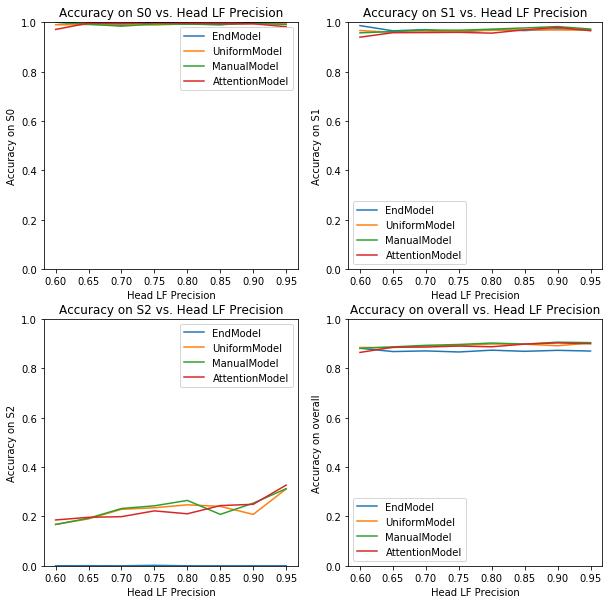

In [13]:
plot_slice_scores(lf_prec_scores, xlabel="Head LF Precision")
#                   custom_ylims={"S2":[0, 0.2]})

## Vary Head LF Recall
_num blue dots in red slice over num red dots in bottom right_

In [11]:
%%time

from simulate import simulate, data_config, experiment_config, model_configs

data_config['head_config']['r'] = 2
experiment_config['use_weak_labels_from_gen_model'] = True
experiment_config['x_var'] = 'cov.recall'
experiment_config['num_trials'] = 10
experiment_config['x_range'] = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

lf_rec_scores = simulate(data_config, generate_synthetic_data, experiment_config, model_configs)
display_scores(lf_rec_scores, experiment_config['x_var'], experiment_config['x_range'])

Simulating: cov.recall=0.6



Simulating: cov.recall=0.65



Simulating: cov.recall=0.7



Simulating: cov.recall=0.75



Simulating: cov.recall=0.8



Simulating: cov.recall=0.85



Simulating: cov.recall=0.9



Simulating: cov.recall=0.95


,EndModel,UniformModel,ManualModel,AttentionModel
cov.recall: 0.6,,,,
S0,0.998074,0.994192,0.988174,0.993332
S1,0.957659,0.979864,0.975513,0.969008
S2,0.000913,0.598215,0.590461,0.574777
overall,0.864100,0.942450,0.936600,0.932300


,EndModel,UniformModel,ManualModel,AttentionModel
cov.recall: 0.65,,,,
S0,0.995710,0.992375,0.988162,0.994216
S1,0.965706,0.979884,0.978969,0.972795
S2,0.002439,0.613734,0.649772,0.620988
overall,0.870500,0.943850,0.946200,0.940600


,EndModel,UniformModel,ManualModel,AttentionModel
cov.recall: 0.7,,,,
S0,1.000000,0.993920,0.995807,0.986583
S1,0.982668,0.986564,0.981118,0.982046
S2,0.000000,0.561585,0.641430,0.635556
overall,0.878550,0.941450,0.947150,0.944950


,EndModel,UniformModel,ManualModel,AttentionModel
cov.recall: 0.75,,,,
S0,1.000000,0.995807,0.993711,0.997904
S1,0.956989,0.963134,0.988479,0.980031
S2,0.000000,0.570136,0.696833,0.633484
overall,0.861500,0.927500,0.957500,0.946000


,EndModel,UniformModel,ManualModel,AttentionModel
cov.recall: 0.8,,,,
S0,0.990513,0.994601,0.994175,0.992656
S1,0.961209,0.973348,0.970419,0.967535
S2,0.000000,0.713280,0.790574,0.769768
overall,0.869550,0.951900,0.957650,0.953400


,EndModel,UniformModel,ManualModel,AttentionModel
cov.recall: 0.85,,,,
S0,0.990081,0.989764,0.988764,0.987939
S1,0.971628,0.971731,0.972704,0.966649
S2,0.000000,0.786519,0.813341,0.803793
overall,0.872100,0.956850,0.959650,0.954350


,EndModel,UniformModel,ManualModel,AttentionModel
cov.recall: 0.9,,,,
S0,0.985254,0.992717,0.994294,0.994810
S1,0.971291,0.963189,0.968630,0.964194
S2,0.000000,0.873462,0.888518,0.861359
overall,0.869900,0.960650,0.966650,0.960850


,EndModel,UniformModel,ManualModel,AttentionModel
cov.recall: 0.95,,,,
S0,0.992097,0.991732,0.989512,0.991225
S1,0.966360,0.969261,0.973897,0.966384
S2,0.000893,0.895596,0.871042,0.897981
overall,0.870100,0.966700,0.967050,0.965450


CPU times: user 1d 14h 9min 59s, sys: 15min 42s, total: 1d 14h 25min 42s
Wall time: 1h 46min 42s


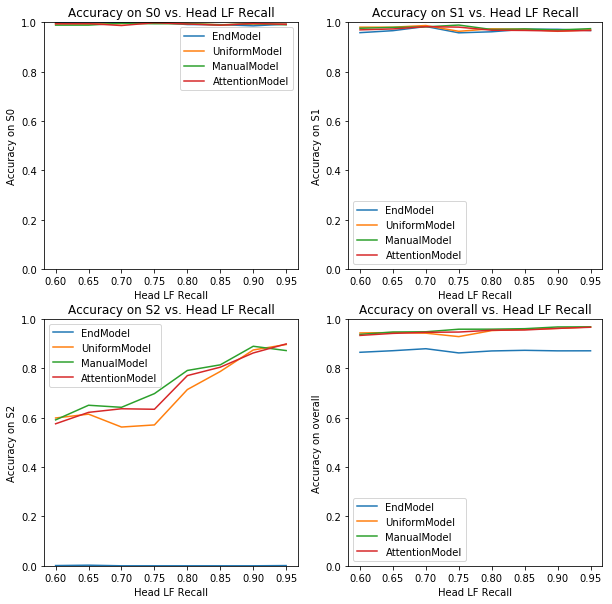

In [12]:
plot_slice_scores(lf_rec_scores, xlabel="Head LF Recall")